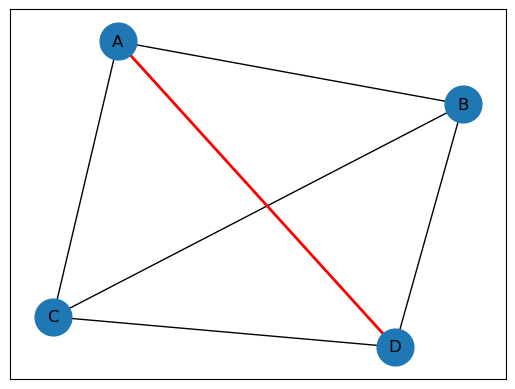

Bulunan en kısa yol: ['A', 'D']


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def create_graph():
    G = nx.Graph()
    edges = [
        ('A', 'B', 1),
        ('B', 'C', 3),
        ('B', 'D', 7),
        ('C', 'D', 1),
        ('A', 'C', 5),
        ('A', 'D', 4)
    ]
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])
    return G

def draw_graph(G, path):
    pos = nx.spring_layout(G)  # düğümlerin pozisyonlarını belirler
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1)

    if path is not None:
        # path listesinden çiftleri oluştur ve bir liste içine al
        edges_in_path = list(zip(path, path[1:])) 
        nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=2)

    plt.show()


def slime_mold_algorithm(G, source, target):
    # en kısa yol hesapla
    path = nx.shortest_path(G, source=source, target=target, weight='weight')
    return path

# Grafı oluştur
G = create_graph()

# Slime Mold Algoritması ile en kısa yolu bul
source, target = 'A', 'D'
path = slime_mold_algorithm(G, source, target)

# Grafiği ve bulunan yolu çiz
draw_graph(G, path)

print("Bulunan en kısa yol:", path)


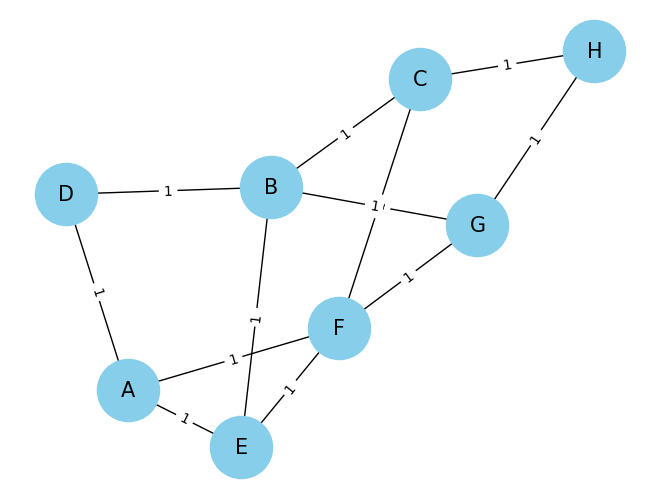

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

def create_custom_graph():
    G = nx.Graph()
    edges = [
        ('A', 'E'),
        ('A', 'F'),
        ('A', 'D'),
        ('B', 'E'),
        ('B', 'D'),
        ('B', 'C'),
        ('C', 'F'),
        ('E', 'F'),
        ('F', 'G'),
        ('G', 'B'),
        ('C', 'H'),
        ('G', 'H')
    ]
    G.add_edges_from(edges)
    for edge in G.edges():
        G[edge[0]][edge[1]]['weight'] = 1
    return G

def draw_custom_graph(G):
    # Düğüm pozisyonlarını otomatik olarak belirle
    pos = nx.spring_layout(G)
    # Düğümleri çiz
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)
    # Kenar ağırlıklarını etiketle
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

my_graph = create_custom_graph()

draw_custom_graph(my_graph)


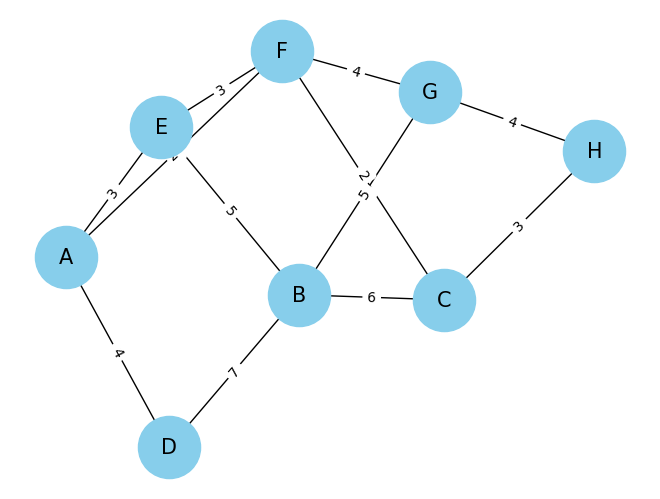

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

def create_custom_graph():
    G = nx.Graph()
    edges = [
        ('A', 'E', 3),
        ('A', 'F', 2),
        ('A', 'D', 4),
        ('B', 'E', 5),
        ('B', 'D', 7),
        ('B', 'C', 6),
        ('C', 'F', 2),
        ('E', 'F', 3),
        ('F', 'G', 4),
        ('G', 'B', 5),
        ('C', 'H', 3),
        ('G', 'H', 4)
    ]
    G.add_weighted_edges_from(edges)
    return G

def draw_custom_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='k', linewidths=1, font_size=15)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

my_graph = create_custom_graph()

draw_custom_graph(my_graph)


In [9]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def slime_mold_algorithm(graph, start, end):
    current_node = start
    path = [current_node]

    while current_node != end:
        neighbors = graph[current_node]
        neighbor_weights = [graph[current_node][neighbor]['weight'] for neighbor in neighbors]
        total_weight = sum(neighbor_weights)
        probabilities = [weight / total_weight for weight in neighbor_weights]
        
        # Bir sonraki düğümü rastgele seç
        next_node = random.choices(list(neighbors), weights=probabilities)[0]
        
        # Yolu güncelle
        path.append(next_node)
        current_node = next_node
    
    return path


G = nx.Graph()
edges = [
 ('A', 'E', 3),
 ('A', 'F', 2),
 ('A', 'D', 4),
 ('B', 'E', 5),
 ('B', 'D', 7),
 ('B', 'C', 6),
 ('C', 'F', 2),
 ('E', 'F', 3),
 ('F', 'G', 4),
 ('G', 'B', 5),
 ('C', 'H', 3),
 ('G', 'H', 4)
 ]
G.add_weighted_edges_from(edges)


start_node = 'A'
end_node = 'H'

shortest_path = slime_mold_algorithm(G, start_node, end_node)

print("En kısa yol:", shortest_path)

En kısa yol: ['A', 'E', 'B', 'D', 'B', 'E', 'A', 'E', 'F', 'C', 'B', 'G', 'B', 'D', 'B', 'C', 'B', 'D', 'A', 'D', 'B', 'D', 'A', 'F', 'G', 'B', 'E', 'F', 'E', 'B', 'G', 'B', 'C', 'B', 'E', 'A', 'F', 'G', 'F', 'G', 'F', 'G', 'B', 'E', 'A', 'E', 'B', 'D', 'B', 'C', 'B', 'C', 'F', 'E', 'B', 'D', 'B', 'E', 'A', 'F', 'E', 'A', 'E', 'B', 'D', 'B', 'G', 'B', 'C', 'F', 'C', 'H']


Iterasyon 1: Yol: ['A', 'D', 'B', 'C', 'B', 'E', 'F', 'C', 'B', 'G', 'B', 'E', 'B', 'C', 'F', 'G', 'B', 'E', 'A', 'D', 'A', 'F', 'G', 'F', 'E', 'B', 'D', 'B', 'D', 'A', 'D', 'B', 'G', 'F', 'A', 'D', 'B', 'C', 'B', 'G', 'H'], Uzunluk: 189
Iterasyon 2: Yol: ['A', 'F', 'E', 'A', 'D', 'B', 'C', 'H'], Uzunluk: 28
Iterasyon 3: Yol: ['A', 'E', 'B', 'D', 'B', 'C', 'H'], Uzunluk: 31
Iterasyon 4: Yol: ['A', 'E', 'A', 'E', 'A', 'D', 'A', 'D', 'B', 'E', 'A', 'D', 'B', 'G', 'F', 'C', 'H'], Uzunluk: 64
Iterasyon 5: Yol: ['A', 'F', 'E', 'A', 'D', 'B', 'D', 'A', 'D', 'A', 'D', 'B', 'E', 'B', 'D', 'A', 'D', 'A', 'F', 'E', 'B', 'D', 'B', 'E', 'B', 'G', 'H'], Uzunluk: 121
Iterasyon 6: Yol: ['A', 'D', 'B', 'D', 'A', 'E', 'F', 'C', 'B', 'D', 'B', 'C', 'B', 'G', 'H'], Uzunluk: 71
Iterasyon 7: Yol: ['A', 'D', 'B', 'C', 'F', 'A', 'D', 'A', 'D', 'B', 'D', 'B', 'D', 'A', 'F', 'G', 'H'], Uzunluk: 75
Iterasyon 8: Yol: ['A', 'D', 'B', 'C', 'H'], Uzunluk: 20
Iterasyon 9: Yol: ['A', 'E', 'F', 'E', 'A', 'D', 'B', 'D'

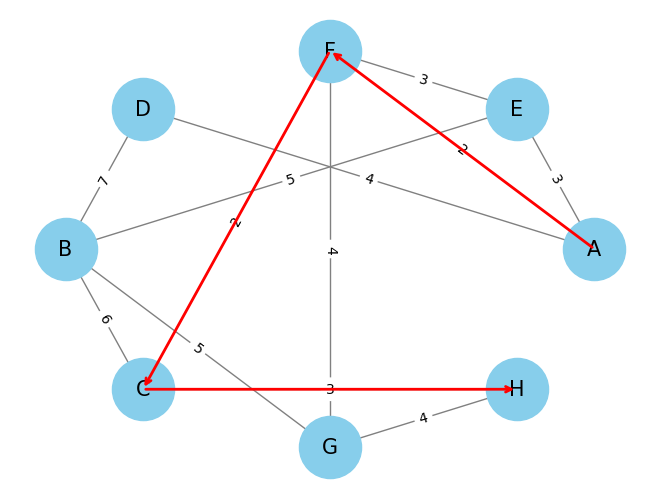

En kısa yol: ['A', 'F', 'C', 'H']
Yol uzunluğu: 7


In [51]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def slime_mold_algorithm(graph, start, end, num_iterations=150):
    best_path = None
    min_path_length = 500
    
    for iteration in range(1, num_iterations+1):
        current_node = start
        path = [current_node]

        while current_node != end:
            neighbors = graph[current_node]
            neighbor_weights = [graph[current_node][neighbor]['weight'] for neighbor in neighbors]
            total_weight = sum(neighbor_weights)
            probabilities = [weight / total_weight for weight in neighbor_weights]

            #  sonraki düğümü ağırlıkları dikkate alarak seç
            next_node = random.choices(list(neighbors), weights=probabilities)[0]

            # yolu güncelle
            path.append(next_node)
            current_node = next_node

        # yolun uzunluğunu kontrol et
        path_length = sum(graph[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))
        
        # yolun uzunluğunu ve yolu ekrana bastır
        print(f"Iterasyon {iteration}: Yol: {path}, Uzunluk: {path_length}")

        # en kısa yolu kontrol et
        if path_length < min_path_length:
            min_path_length = path_length
            best_path = path

    return best_path

G = nx.Graph()
edges = [
    ('A', 'E', 3),
    ('A', 'F', 2),
    ('A', 'D', 4),
    ('B', 'E', 5),
    ('B', 'D', 7),
    ('B', 'C', 6),
    ('C', 'F', 2),
    ('E', 'F', 3),
    ('F', 'G', 4),
    ('G', 'B', 5),
    ('C', 'H', 3),
    ('G', 'H', 4)
]
G.add_weighted_edges_from(edges)

start_node = 'A'
end_node = 'H'

slime_mold_path = slime_mold_algorithm(G, start_node, end_node)


pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# en kısa yol çiz
for i in range(len(slime_mold_path) - 1):
    plt.annotate("", xy=pos[slime_mold_path[i + 1]], xytext=pos[slime_mold_path[i]], arrowprops=dict(arrowstyle="->", color='red', lw=2))

plt.show()

print("En kısa yol:", slime_mold_path)
print("Yol uzunluğu:", sum(G[slime_mold_path[i]][slime_mold_path[i+1]]['weight'] for i in range(len(slime_mold_path)-1)))


Iterasyon 1: Yol: A -> F -> G -> B -> C -> B -> D -> B -> C -> F -> C -> F -> A -> D -> B -> G -> B -> G -> H, Uzunluk: 81
Iterasyon 2: Yol: A -> D -> B -> G -> B -> E -> F -> A -> E -> B -> C -> H, Uzunluk: 48
Iterasyon 3: Yol: A -> F -> E -> B -> C -> B -> E -> F -> G -> B -> D -> B -> D -> B -> D -> A -> F -> C -> B -> E -> F -> A -> D -> B -> G -> B -> G -> F -> C -> B -> C -> H, Uzunluk: 145
Iterasyon 4: Yol: A -> D -> B -> C -> B -> E -> A -> D -> A -> E -> B -> G -> B -> D -> B -> E -> F -> A -> D -> A -> E -> B -> D -> B -> D -> B -> E -> A -> E -> F -> E -> F -> C -> B -> E -> F -> G -> B -> C -> B -> D -> B -> G -> B -> D -> A -> F -> G -> B -> E -> F -> C -> B -> D -> B -> E -> B -> C -> F -> G -> B -> E -> A -> E -> B -> E -> B -> C -> F -> G -> F -> G -> F -> G -> F -> E -> A -> D -> A -> E -> B -> E -> B -> D -> B -> E -> F -> G -> F -> A -> D -> B -> D -> B -> D -> A -> E -> A -> D -> B -> D -> A -> E -> F -> G -> B -> E -> B -> D -> A -> D -> A -> D -> B -> D -> B -> E 

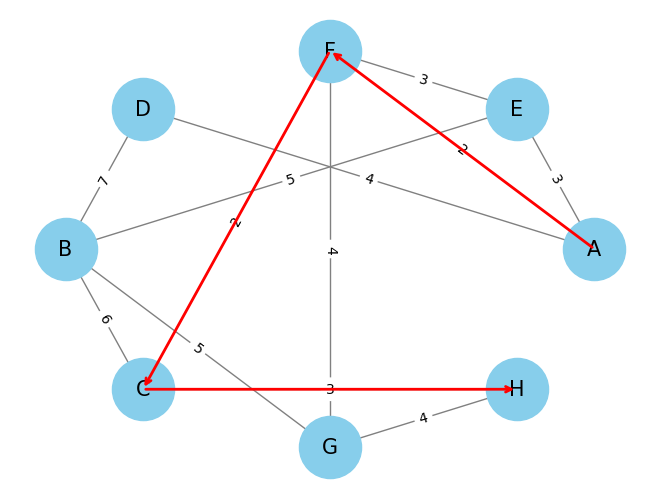

En kısa yol: ['A', 'F', 'C', 'H']
Yol uzunluğu: 7


In [55]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def slime_mold_algorithm(graph, start, end, num_iterations=200):
    best_path = None
    # veya başka bir graf için = float(inf) 
    min_path_length = 500
    
    for iteration in range(1, num_iterations+1):
        current_node = start
        path = [current_node]

        while current_node != end:
            neighbors = graph[current_node]
            neighbor_weights = [graph[current_node][neighbor]['weight'] for neighbor in neighbors]
            total_weight = sum(neighbor_weights)
            probabilities = [weight / total_weight for weight in neighbor_weights]

            # Bir sonraki düğümü ağırlıkları dikkate alarak seç
            next_node = random.choices(list(neighbors), weights=probabilities)[0]

            # Yolu güncelle
            path.append(next_node)
            current_node = next_node

        # Yolun uzunluğunu kontrol et
        path_length = sum(graph[path[i]][path[i+1]]['weight'] for i in range(len(path)-1))
        
        if path_length < min_path_length:
            min_path_length = path_length
            best_path = path

        print(f"Iterasyon {iteration}: Yol: {' -> '.join(path)}, Uzunluk: {path_length}")
    
    return best_path

G = nx.Graph()
edges = [
    ('A', 'E', 3),
    ('A', 'F', 2),
    ('A', 'D', 4),
    ('B', 'E', 5),
    ('B', 'D', 7),
    ('B', 'C', 6),
    ('C', 'F', 2),
    ('E', 'F', 3),
    ('F', 'G', 4),
    ('G', 'B', 5),
    ('C', 'H', 3),
    ('G', 'H', 4)
]
G.add_weighted_edges_from(edges)

start_node = 'A'
end_node = 'H'

slime_mold_path = slime_mold_algorithm(G, start_node, end_node)

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# en kısa yol ciz
for i in range(len(slime_mold_path) - 1):
    plt.annotate("", xy=pos[slime_mold_path[i + 1]], xytext=pos[slime_mold_path[i]], arrowprops=dict(arrowstyle="->", color='red', lw=2))

plt.show()

print("En kısa yol:", slime_mold_path)
print("Yol uzunluğu:", sum(G[slime_mold_path[i]][slime_mold_path[i+1]]['weight'] for i in range(len(slime_mold_path)-1)))
